# Reacher Task, Deep RL for Continuous Control
---

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
## Existing DDPG Code from Udacity DRLND repository
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')
agent = Agent(state_size=33, action_size=4, random_seed=5)


brain_name = env.brain_names[0]
brain = env.brains[brain_name]
START_DECAY = 250
GOAL_SCORE = 30

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent with DDPG

Episode 100	Average Score: 4.09
Episode 200	Average Score: 14.41
Episode 300	Average Score: 24.79
Episode 359	Average Score: 30.02Environment solved! achieved an average score of 30 over 100 episodes at episode 359
Episode 400	Average Score: 31.48
Episode 500	Average Score: 35.74
Episode 600	Average Score: 37.02


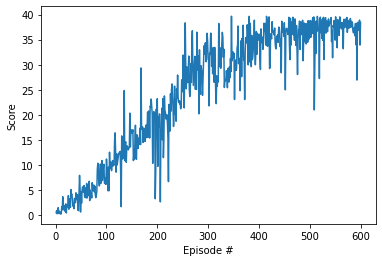

In [3]:
def ddpg(n_episodes=600, max_t=300, print_every=100):
    SOLVED = False
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = 0
        decay = i_episode >= START_DECAY

        while True:
            action = agent.act(state, decay_noise=decay)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if np.mean(scores_deque) >= GOAL_SCORE and not SOLVED:
            SOLVED = True
            print(f'Environment solved! achieved an average score of 30 over 100 episodes at episode {i_episode}')
            torch.save(agent.actor_local.state_dict(), 'checkpointactor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpointcritic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()

### 4. Watch a Smart Agent!

In [5]:
# env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')
agent.actor_local.load_state_dict(torch.load('checkpointactor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpointcritic.pth'))
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
for t in range(200):
    action = agent.act(state, add_noise=False)
    env_info = env.step(action)[brain_name]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    if done:
        break 

env.close()

OSError: handle is closed

ERROR:root:Exception calling application: [WinError 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Anaconda3\envs\reacher\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "C:\Anaconda3\envs\reacher\lib\site-packages\unityagents\rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "C:\Anaconda3\envs\reacher\lib\multiprocessing\connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "C:\Anaconda3\envs\reacher\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed
